In [1]:
using Distributions
using HypothesisTests
using QuadGK
using Roots
using StatsPlots
default(fmt=:png)

cdfsum(dist, x) = quadgk(y -> pdf(dist, y) * cdf(dist, x-y), extrema(dist)...)[1]

empirical_cdf(A, x) = count(≤(x), A) / length(A)

h2(x, y) = (x + y > 0) + (x + y == 0)/2

function nonparametric_t_statistic(X, p=1/2)
    n = length(X)
    phat = 2/(n*(n-1)) * sum(h2(X[i], X[j]) for i in 1:n for j in i+1:n)
    sigmahat2 = 1/(n-1) * sum((mean(h2(X[i], X[j]) for j in 1:n if j != i) - phat)^2 for i in 1:n)
    sehat = 2√(sigmahat2/n)
    t = (phat - p)/sehat
end

function nonparametric_pvalue(X, p=1/2; r=0.6length(X)+1)
    t = nonparametric_t_statistic(X, p)
    pval = 2ccdf(TDist(max(1e-2, n-r)), abs(t))
end

nonparametric_pvalue (generic function with 2 methods)

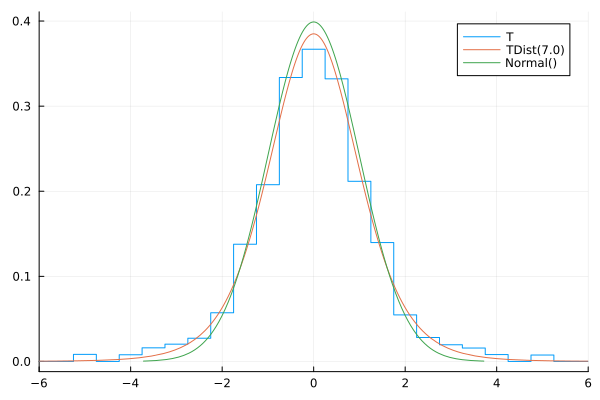

In [2]:
n = 10
X = rand(Cauchy(), n, 10^5)
T = [nonparametric_t_statistic(x) for x in eachcol(X)]
stephist(T; norm=true, label="T", bin=-6.25:0.5:6.25)
plot!(TDist(0.6n+1); label="TDist($(0.6n+1))")
plot!(Normal(); label="Normal()")
plot!(xlim=(-6, 6))

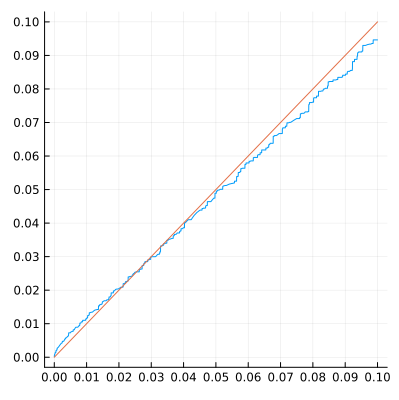

In [3]:
n = 15
L = 10^5
X = rand(Cauchy(), n, L)
#X = rand(Normal(), n, L)
pval = [nonparametric_pvalue(x) for x in eachcol(X)]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.01:1)
plot!(size=(400, 400))

dist = InverseGamma{Float64}(
invd: Gamma{Float64}(α=1.0, θ=1.0)
θ: 1.0
)

a = 1.9880836080142859
b / 2 = 1.988083608014286
median(dist) = 1.4426950408889638


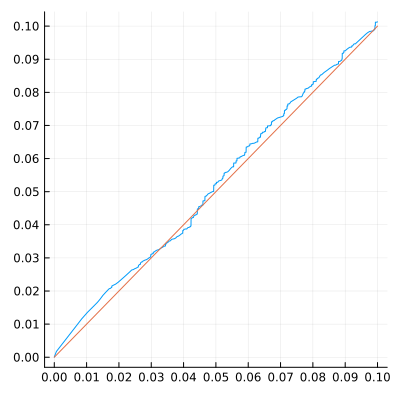

In [4]:
#dist = Exponential()
#dist = LogNormal()
dist = InverseGamma(1, 1)
a = find_zero(a -> cdfsum(dist-a, 0) - 0.5, (-10, 10))
b = find_zero(b -> cdfsum(dist, b) - 0.5, (-10, 10))
@show dist a b/2
@show median(dist)
dist = dist - a
n = 20
L = 10^5
X = rand(dist, n, L)
pval = [nonparametric_pvalue(x) for x in eachcol(X)]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.01:1)
plot!(size=(400, 400))

dist = InverseGamma{Float64}(
invd: Gamma{Float64}(α=1.0, θ=1.0)
θ: 1.0
)

a = 1.9880836080142859
b / 2 = 1.988083608014286
median(dist) = 1.4426950408889638


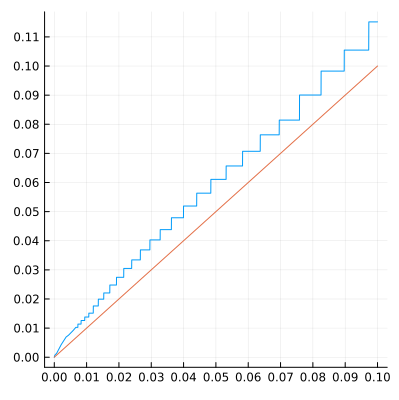

In [5]:
#dist = Exponential()
#dist = LogNormal()
dist = InverseGamma(1, 1)
a = find_zero(a -> cdfsum(dist-a, 0) - 0.5, (-10, 10))
b = find_zero(b -> cdfsum(dist, b) - 0.5, (-10, 10))
@show dist a b/2
@show median(dist)
dist = dist - a
n = 20
L = 10^5
pval = [pvalue(SignedRankTest(rand(dist, n))) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.01:1)
plot!(size=(400, 400))

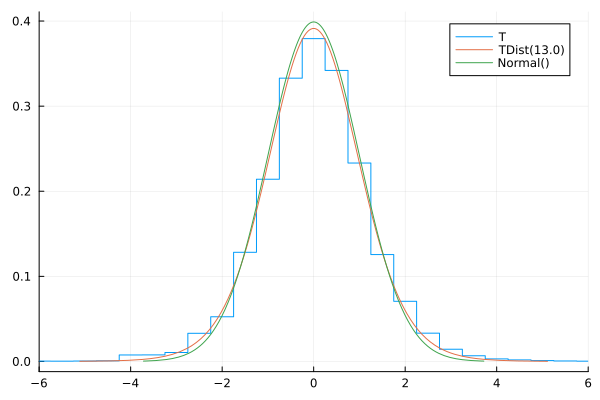

In [6]:
X = rand(dist, n, L)
T = [nonparametric_t_statistic(x) for x in eachcol(X)]
stephist(T; norm=true, label="T", bin=-6.25:0.5:6.25)
plot!(TDist(0.6n+1); label="TDist($(0.6n+1))")
plot!(Normal(); label="Normal()")
plot!(xlim=(-6, 6))

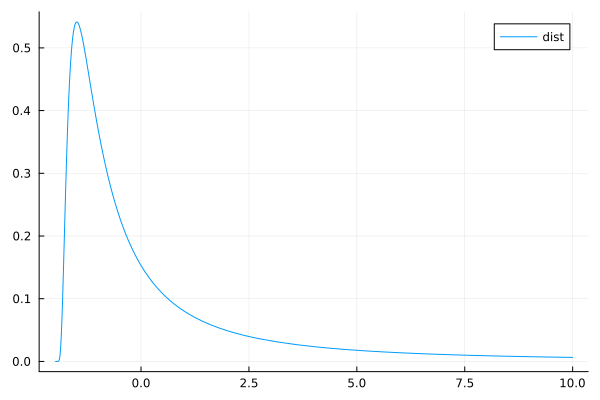

In [7]:
plot(dist, -2, 10; label="dist")

median(Δx) = 0.0008222993525965894


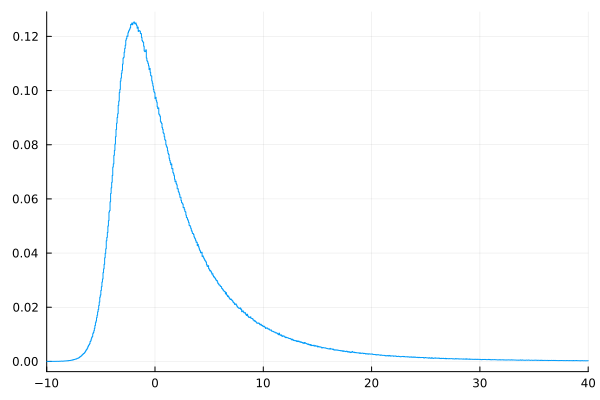

In [8]:
dist1 = LogNormal(log(5), 0.2)
dist2 = LogNormal(log(5), 0.8)
n = 10^7
Δx = rand(dist2, n) - rand(dist1, n)
@show median(Δx)
stephist(Δx; norm=true, label="", xlim=(-10, 40))

In [9]:
@show median(Δx)
@show m = median(rand(Δx)+rand(Δx) for _ in 1:10^6)
@show m/2;

median(Δx) = 0.0008222993525965894
m = median((rand(Δx) + rand(Δx) for _ = 1:10 ^ 6)) = 1.3551823436928587
m / 2 = 0.6775911718464294


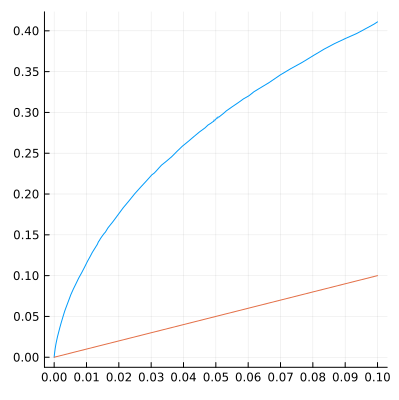

In [10]:
n = 100
L = 10^5
pval = [pvalue(SignedRankTest(rand(dist2, n) - rand(dist1, n))) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.05:1)
plot!(size=(400, 400))

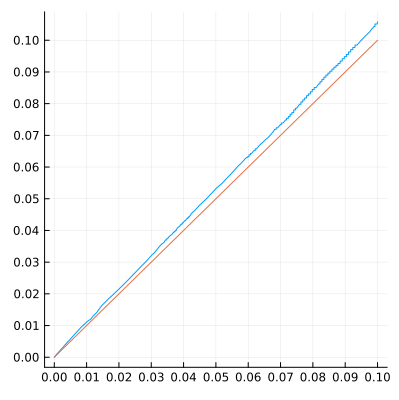

In [11]:
n = 100
L = 10^5
pval = [pvalue(SignedRankTest(rand(dist2-m/2, n) - rand(dist1, n))) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.01:1)
plot!(size=(400, 400))

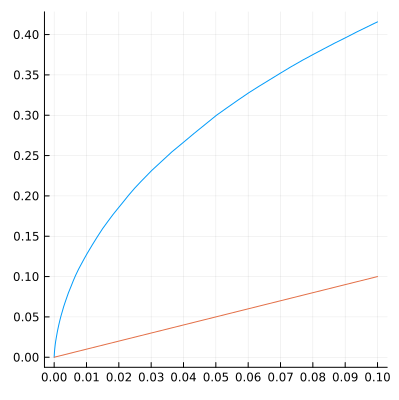

In [12]:
n = 100
L = 10^5
pval = [nonparametric_pvalue(rand(dist2, n) - rand(dist1, n); ) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.05:1)
plot!(size=(400, 400))

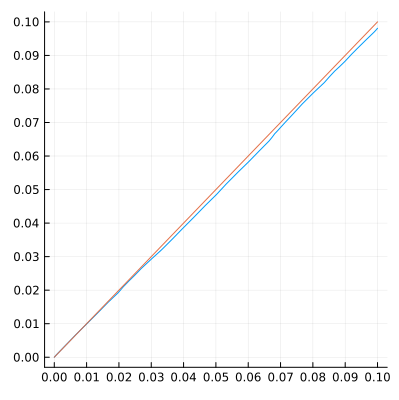

In [13]:
n = 100
L = 10^5
pval = [nonparametric_pvalue(rand(dist2-m/2, n) - rand(dist1, n); ) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.01:1)
plot!(size=(400, 400))

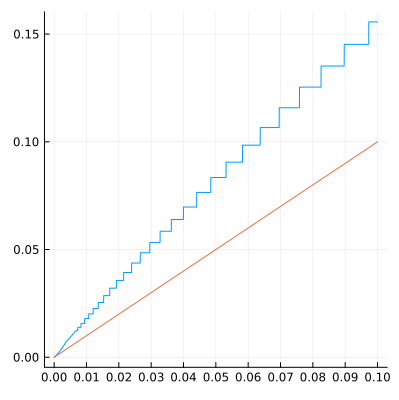

In [14]:
n = 20
L = 10^5
pval = [pvalue(SignedRankTest(rand(dist2, n) - rand(dist1, n))) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.05:1)
plot!(size=(400, 400))

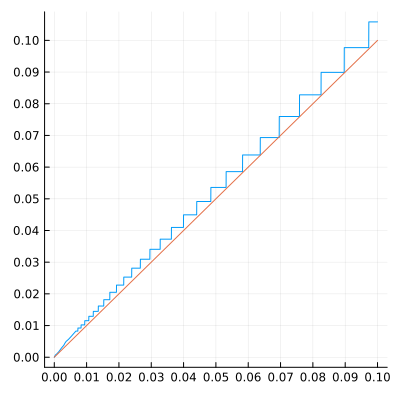

In [15]:
n = 20
L = 10^5
pval = [pvalue(SignedRankTest(rand(dist2-m/2, n) - rand(dist1, n))) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.01:1)
plot!(size=(400, 400))

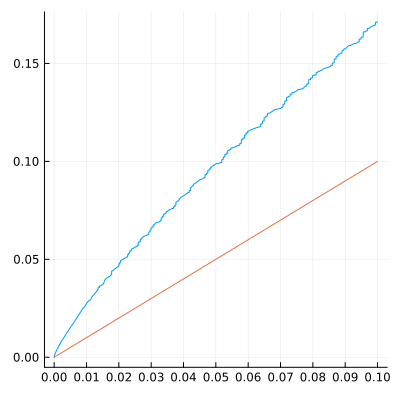

In [16]:
n = 20
L = 10^5
pval = [nonparametric_pvalue(rand(dist2, n) - rand(dist1, n); ) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.05:1)
plot!(size=(400, 400))

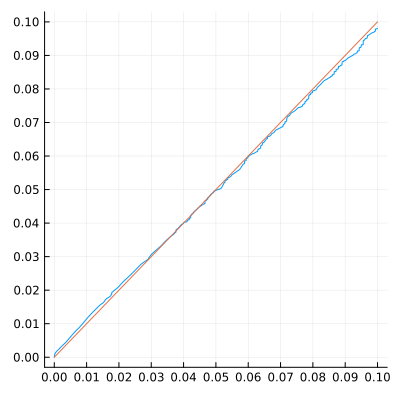

In [17]:
n = 20
L = 10^5
pval = [nonparametric_pvalue(rand(dist2-m/2, n) - rand(dist1, n); ) for _ in 1:L]
plot(x -> empirical_cdf(pval, x), 0, 0.1; label="")
plot!(identity; label="")
plot!(xtick=0:0.01:1, ytick=0:0.01:1)
plot!(size=(400, 400))